In [1]:
!pip3 install snowflake-snowpark-python

In [2]:
from snowflake.snowpark import Session
from snowflake.snowpark.functions import col, avg, sum, count, max, min
import matplotlib.pyplot as plt

In [3]:
# Connection details (replace with your actual credentials)
connection_parameters = {
    "account": "uiioyzf-vr10915",
    "user": "gds",
    "password": "Gds@@2023",
    "role": "ACCOUNTADMIN",
    "warehouse": "COMPUTE_WAREHOUSE",
    "database": "CUSTOMER_DB",
    "schema": "TARGET"
}

In [4]:
# Create a session
session = Session.builder.configs(connection_parameters).create()

# Load data from the 'snowpipe' table
df = session.table("CUSTOMER_CSV")

In [5]:
from snowflake.snowpark.functions import year

# Example transformations and analyses
# 1. Age distribution of customers
df_age = df.withColumn("AGE", 2023 - year(col("DAY_OF_BIRTH")))
age_distribution = df_age.groupBy("AGE").agg(count("*").alias("COUNT")).sort("AGE")

In [6]:
# 2. Customer count by country
customer_by_country = df.groupBy("COUNTRY_NAME").agg(count("*").alias("CUSTOMER_COUNT")).sort(col("CUSTOMER_COUNT").desc())

In [7]:
# Execute the queries and collect the results for visualization
age_distribution_result = age_distribution.toPandas()
customer_by_country_result = customer_by_country.toPandas()
customer_by_country_result['COUNTRY_NAME'] = customer_by_country_result['COUNTRY_NAME'].fillna('Unknown')
age_distribution_clean = age_distribution_result.dropna(subset=['AGE'])

print(age_distribution_clean)
print(customer_by_country_result)

     AGE  COUNT
1   31.0    137
2   32.0    132
3   33.0    177
4   34.0    160
5   35.0    154
..   ...    ...
65  95.0    118
66  96.0    165
67  97.0    125
68  98.0    133
69  99.0    129

[69 rows x 2 columns]
    COUNTRY_NAME  CUSTOMER_COUNT
0  United States            9704
1        Unknown             145


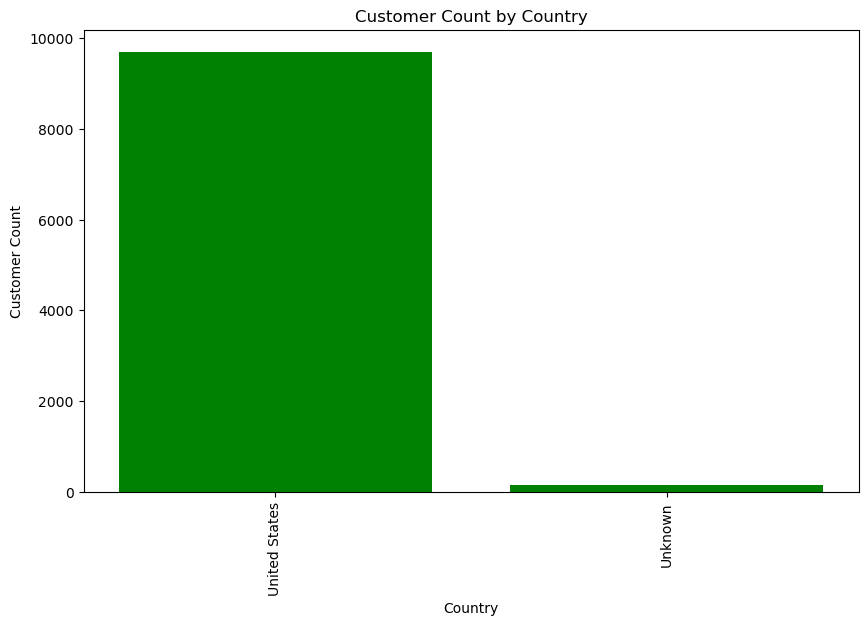

In [8]:
# Customer Count by Country
plt.figure(figsize=(10, 6))
plt.bar(customer_by_country_result['COUNTRY_NAME'], customer_by_country_result['CUSTOMER_COUNT'], color='green')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Customer Count')
plt.title('Customer Count by Country')
plt.show()

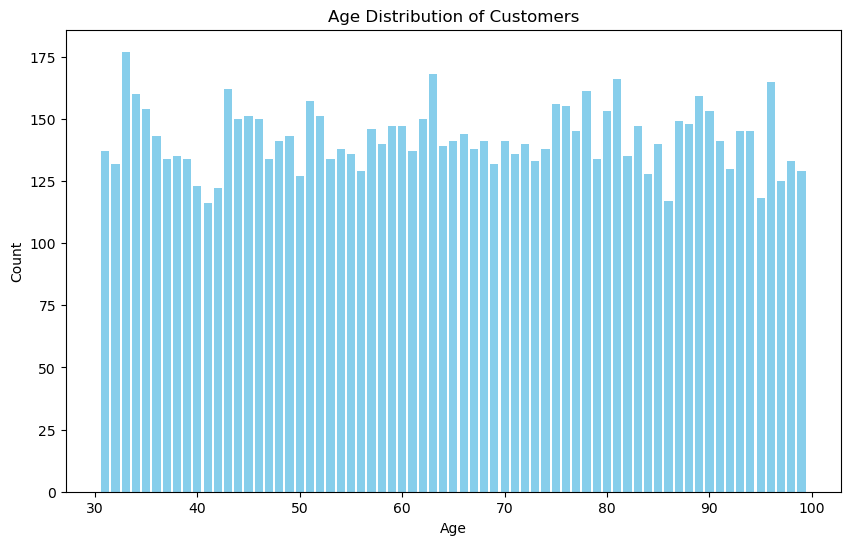

In [9]:
# Visualize the results
# Age Distribution
plt.figure(figsize=(10, 6))
plt.bar(age_distribution_clean['AGE'], age_distribution_clean['COUNT'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Customers')
plt.show()